Loading dataset... from /home/innovation-hacking/luebbet/dev/important_datasets/pick_and_place_limited_rotation_3cams
Initialized dataset pick_and_place_limited_rotation_3cams with EmbodimentTag.NEW_EMBODIMENT



=========================================== UR5 Dataset ============================================
{'action.gripper': 'np: [16, 1] float64',
 'action.robot_arm': 'np: [16, 6] float64',
 'annotation.human.task_description': ['Pick up the blue cube and place it on '
                                       'the black platform'],
 'state.gripper': 'np scalar: 1.6300404013236403e-06 [1, 1] float64',
 'state.robot_arm': 'np: [1, 6] float64',
 'video.camera_global_front': 'np: [1, 512, 512, 3] uint8',
 'video.camera_wrist': 'np: [1, 512, 512, 3] uint8'}
dict_keys(['video.camera_wrist', 'video.camera_global_front', 'state.robot_arm', 'state.gripper', 'action.robot_arm', 'action.gripper', 'annotation.human.task_description'])


/home/innovation-hacking/luebbet/venvs/combined_robots_luebbet/lib/python3.10/site-packages/torchvision/io/_video_deprecation_warning.py:9: UserWarning: The video decoding and encoding capabilities of torchvision are deprecated from version 0.22 and will be removed in version 0.24. We recommend that you migrate to TorchCodec, where we'll consolidate the future decoding/encoding capabilities of PyTorch: https://github.com/pytorch/torchcodec
  warnings.warn(
/home/innovation-hacking/luebbet/venvs/combined_robots_luebbet/lib/python3.10/site-packages/torchvision/io/_video_deprecation_warning.py:9: UserWarning: The video decoding and encoding capabilities of torchvision are deprecated from version 0.22 and will be removed in version 0.24. We recommend that you migrate to TorchCodec, where we'll consolidate the future decoding/encoding capabilities of PyTorch: https://github.com/pytorch/torchcodec
  warnings.warn(
/home/innovation-hacking/luebbet/venvs/combined_robots_luebbet/lib/python3.10/

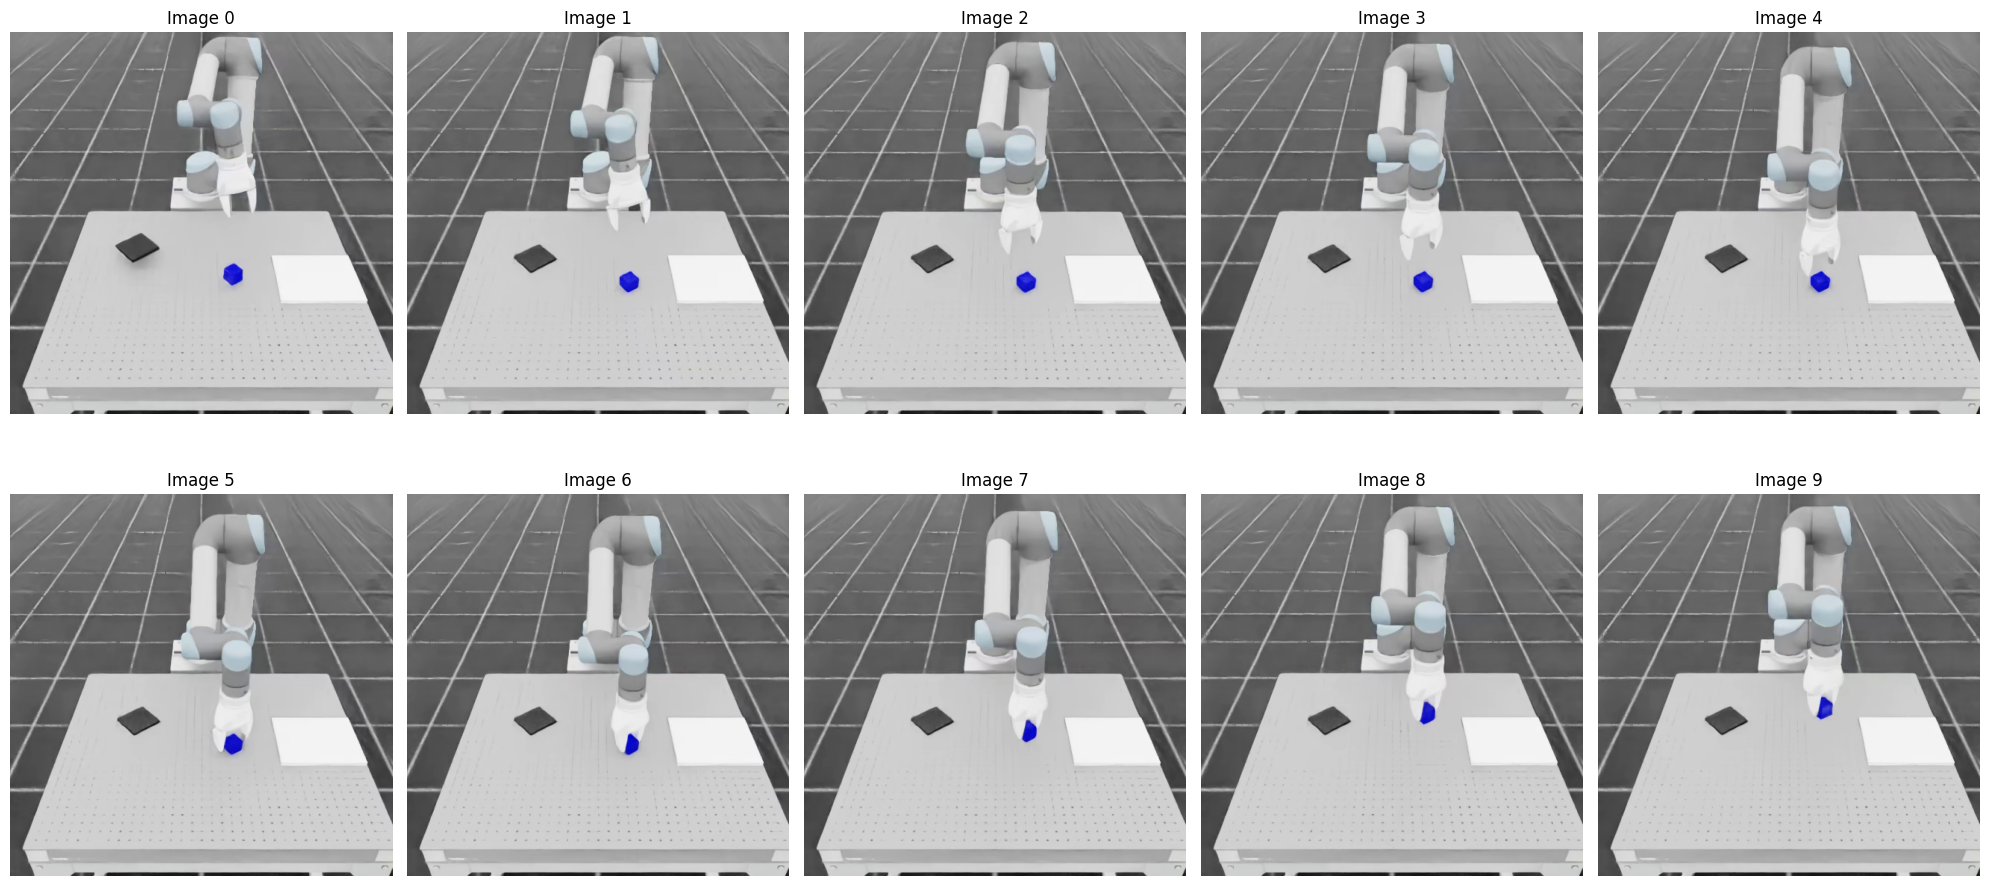

In [13]:
from gr00t.utils.misc import any_describe
from gr00t.data.dataset import LeRobotSingleDataset

from gr00t.data.schema import EmbodimentTag
import os
import gr00t
from gr00t.experiment.data_config import TNGUR5SchunkConfig3CamsSim, TNGUR5SchunkConfig2CamsSim

import matplotlib.pyplot as plt

# REPO_PATH is the path of the pip install gr00t repo and one level up
REPO_PATH = os.path.dirname(os.path.dirname(gr00t.__file__))
DATA_PATH = os.path.join("/home/innovation-hacking/luebbet/dev/important_datasets/pick_and_place_limited_rotation_3cams")

print("Loading dataset... from", DATA_PATH)

config = TNGUR5SchunkConfig2CamsSim()
modality_configs = config.modality_config()
to_apply_transforms = config.transform()


embodiment_tag = EmbodimentTag.NEW_EMBODIMENT


dataset = LeRobotSingleDataset(
    DATA_PATH, 
    modality_configs,  
    embodiment_tag=embodiment_tag,
    video_backend="torchvision_av",
)

print('\n'*2)
print("="*100)
print(f"{' UR5 Dataset ':=^100}")
print("="*100)

# print the 7th data point
resp = dataset[7]
any_describe(resp)
print(resp.keys())

images_list = []

for i in range(100):
    if i % 10 == 0:
        resp = dataset[i]
        img = resp["video.camera_global_front"][0]
        images_list.append(img)


fig, axs = plt.subplots(2, 5, figsize=(20, 10))
for i, ax in enumerate(axs.flat):
    ax.imshow(images_list[i])
    ax.axis("off")
    ax.set_title(f"Image {i}")
plt.tight_layout() # adjust the subplots to fit into the figure area.
plt.show()

